In [1]:
import pandas as pd

In [2]:
df=pd.read_excel('Train_dataset.xlsx',index_col='people_ID')

In [3]:
df.shape

(10714, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10714 entries, 1 to 22695
Data columns (total 27 columns):
Region                    10714 non-null object
Gender                    10714 non-null object
Designation               10714 non-null object
Name                      10694 non-null object
Married                   10714 non-null object
Children                  10403 non-null float64
Occupation                9967 non-null object
Mode_transport            10711 non-null object
cases/1M                  10714 non-null int64
Deaths/1M                 10714 non-null int64
comorbidity               10488 non-null object
Age                       10714 non-null int64
Coma score                10714 non-null int64
Pulmonary score           10714 non-null object
cardiological pressure    10617 non-null object
Diuresis                  9998 non-null float64
Platelets                 9790 non-null float64
HBB                       10698 non-null float64
d-dimer                   9600

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10714 entries, 1 to 22695
Data columns (total 27 columns):
Region                    10714 non-null object
Gender                    10714 non-null object
Designation               10714 non-null object
Name                      10694 non-null object
Married                   10714 non-null object
Children                  10403 non-null float64
Occupation                9967 non-null object
Mode_transport            10711 non-null object
cases/1M                  10714 non-null int64
Deaths/1M                 10714 non-null int64
comorbidity               10488 non-null object
Age                       10714 non-null int64
Coma score                10714 non-null int64
Pulmonary score           10714 non-null object
cardiological pressure    10617 non-null object
Diuresis                  9998 non-null float64
Platelets                 9790 non-null float64
HBB                       10698 non-null float64
d-dimer                   9600

In [6]:
df.isnull().sum()

Region                       0
Gender                       0
Designation                  0
Name                        20
Married                      0
Children                   311
Occupation                 747
Mode_transport               3
cases/1M                     0
Deaths/1M                    0
comorbidity                226
Age                          0
Coma score                   0
Pulmonary score              0
cardiological pressure      97
Diuresis                   716
Platelets                  924
HBB                         16
d-dimer                   1114
Heart rate                1114
HDL cholesterol             35
Charlson Index               0
Blood Glucose                0
Insurance                 1090
salary                       0
FT/month                   723
Infect_Prob                  0
dtype: int64

In [7]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

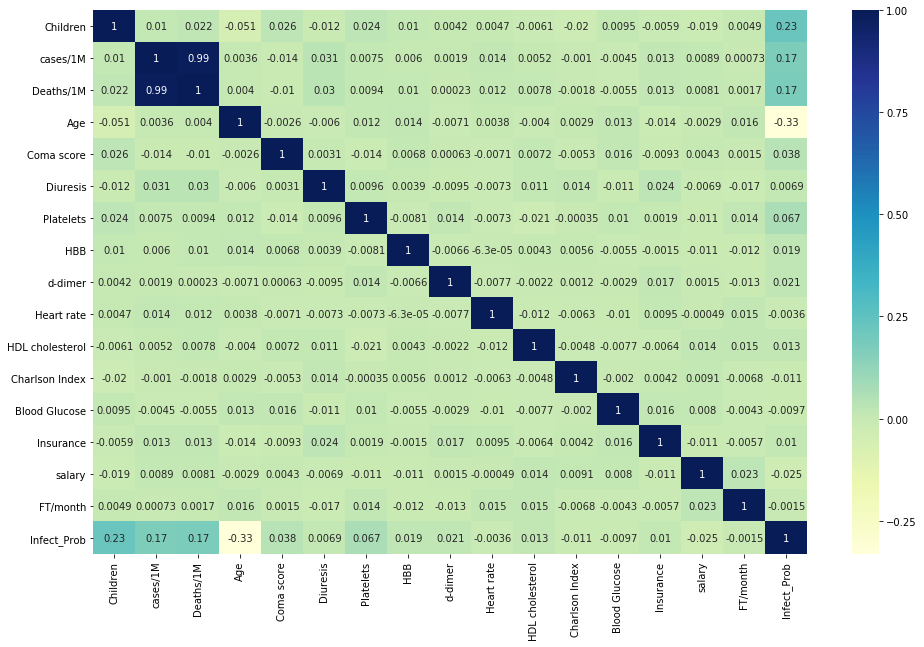

In [8]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.savefig('corrplot')
plt.show()

In [9]:
df[df.columns[0:]].corr()['Infect_Prob'][:]

Children           0.226795
cases/1M           0.172871
Deaths/1M          0.174994
Age               -0.331258
Coma score         0.038400
Diuresis           0.006887
Platelets          0.066727
HBB                0.019361
d-dimer            0.021304
Heart rate        -0.003647
HDL cholesterol    0.013288
Charlson Index    -0.011368
Blood Glucose     -0.009654
Insurance          0.009996
salary            -0.024621
FT/month          -0.001474
Infect_Prob        1.000000
Name: Infect_Prob, dtype: float64

In [10]:
cols=['Designation','Name','Insurance','salary','Region']

In [11]:
df1=df.drop(df[cols],axis=1)

In [12]:
df1['Children']=df1['Children'].fillna(0)

In [13]:
df1.iat[2881,4]='Car'
df1.iat[3588,4]='Public'
df1.iat[8733,4]='Car'

In [14]:
for column in ['Occupation', 'comorbidity', 'cardiological pressure', 'Diuresis', 'Platelets','HBB','d-dimer','Heart rate','HDL cholesterol','FT/month']:
    df1[column].fillna(df1[column].mode()[0], inplace=True)

In [15]:
df1.shape

(10714, 22)

In [16]:
df2=df1.drop('Infect_Prob',axis=1)

In [17]:
df3=df1['Infect_Prob']

In [18]:
df4=df3.values

In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder



# Define which columns should be encoded vs scaled
columns_to_encode = [ 'Gender', 'Married', 'Occupation',
       'Mode_transport', 'comorbidity'
    , 'Pulmonary score', 'cardiological pressure']
columns_to_scale  = ['Diuresis',
       'Platelets', 'HBB', 'd-dimer', 'Heart rate', 'HDL cholesterol',
       'Charlson Index', 'Blood Glucose', 'FT/month','Children','cases/1M', 'Deaths/1M','Age','Coma score']

# Instantiate encoder/scaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()
ohe    = OneHotEncoder(sparse=False)

# Scale and Encode Separate Columns
scaled_columns  = scaler_x.fit_transform(df2[columns_to_scale]) 
encoded_columns =    ohe.fit_transform(df2[columns_to_encode])
# scaled_target=scaler_y.fit_transform(df3) 

# Concatenate (Column-Bind) Processed Columns Back Together
processed_data = np.concatenate([scaled_columns, encoded_columns], axis=1)

C:\Users\DEEPAK KUMAR\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DEEPAK KUMAR\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [20]:
len(processed_data[0])

42

In [21]:
scaled_target=scaler_y.fit_transform(df4.reshape(-1, 1))

In [22]:
scaled_target

array([[-0.29469935],
       [-0.10612538],
       [ 1.96205619],
       ...,
       [-0.42833751],
       [ 0.14267007],
       [ 1.50472785]])

In [23]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [24]:
reg = xgb.XGBRegressor(n_estimators=2000)

In [25]:

from sklearn.model_selection import cross_val_score
score=cross_val_score(reg,processed_data,scaled_target,cv=10)

[23:55:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:57:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:57:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:57:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:57:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [26]:
score.mean()

0.13279632420402782

In [27]:
reg.fit(processed_data,scaled_target,verbose=True)

[23:58:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=2000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [28]:
fd=pd.read_excel('Test_dataset.xlsx',index_col='people_ID')

In [29]:
fd.head()

,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,...,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
people_ID,,,,,,,,,,,,,,,,,,,,,
5942,Delhi,Female,Mrs,smt rekha prajapat,YES,2,Driver,Public,4,1,...,153,196,240,85,53,17,3,3900000,1300000,1
18664,Delhi,Male,Mr,nirmal,YES,2,Legal,Walk,4,1,...,95,138,241,81,61,2,5,1800000,1300000,1
5603,Delhi,Female,Mrs,pinky,YES,2,Sales,Car,4,1,...,40,166,236,88,47,24,3,5000000,2000000,2
5649,Delhi,Female,Mrs,pooja @aafrin,YES,2,Sales,Car,4,1,...,78,83,211,87,52,13,6,3100000,600000,2
5099,Delhi,Female,Mrs,anjali,YES,2,Business,Car,4,1,...,109,207,312,94,68,39,5,2300000,1500000,1


In [30]:
cols=['Designation','Name','Insurance','salary','Region']

In [31]:
fd1=fd.drop(fd[cols],axis=1)

In [32]:
fd1.shape

(14498, 21)

In [33]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder



# Define which columns should be encoded vs scaled
columns_to_encode = ['Gender', 'Married', 'Occupation',
       'Mode_transport', 'comorbidity'
    , 'Pulmonary score', 'cardiological pressure']
columns_to_scale  = ['Diuresis',
       'Platelets', 'HBB', 'd-dimer', 'Heart rate', 'HDL cholesterol',
       'Charlson Index', 'Blood Glucose', 'FT/month','Children','cases/1M', 'Deaths/1M','Age','Coma score']

# Instantiate encoder/scaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()
ohe    = OneHotEncoder(sparse=False)

# Scale and Encode Separate Columns
scaled_columns  = scaler_x.fit_transform(fd1[columns_to_scale]) 
encoded_columns =    ohe.fit_transform(fd1[columns_to_encode])
# scaled_target=scaler_y.fit_transform(df3) 

# Concatenate (Column-Bind) Processed Columns Back Together
processed_data_test = np.concatenate([scaled_columns, encoded_columns], axis=1)

C:\Users\DEEPAK KUMAR\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DEEPAK KUMAR\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [34]:
len(processed_data_test[0])

42

In [35]:
fd['Region'].value_counts()

Pune                  2503
Thiruvananthapuram    2502
Kolkata               2483
Mumbai                2475
Hyderabad             2457
Delhi                 2078
Name: Region, dtype: int64

In [36]:
df['Occupation'].value_counts()

Legal            1174
Sales            1131
Manufacturing    1120
Researcher       1115
Farmer           1113
Cleaner          1111
Clerk            1078
Driver           1072
Business         1053
Name: Occupation, dtype: int64

In [37]:
df['Mode_transport'].value_counts()

Public    3588
Walk      3568
Car       3555
Name: Mode_transport, dtype: int64

In [38]:
df['comorbidity'].value_counts()

Hypertension              2642
None                      2637
Diabetes                  2614
Coronary Heart Disease    2595
Name: comorbidity, dtype: int64

In [39]:
df['cardiological pressure'].value_counts()

Normal      2681
Stage-01    2657
Elevated    2641
Stage-02    2638
Name: cardiological pressure, dtype: int64

In [40]:
pred = reg.predict(processed_data_test)

In [41]:
pred

array([-0.1566124 , -0.26355302, -0.18523383, ..., -0.912431  ,
       -0.75819445, -0.6433625 ], dtype=float32)

In [42]:
scaler_y = StandardScaler()
scaled_target=scaler_y.fit_transform(df4.reshape(-1, 1))

inversed = scaler_y.inverse_transform(pred.reshape(-1,1))


In [43]:
inversed

array([[50.608974],
       [49.467472],
       [50.303463],
       ...,
       [42.541237],
       [44.187584],
       [45.41332 ]], dtype=float32)

In [44]:
t=pd.DataFrame(inversed)

In [45]:
t.mean()

0    52.687057
dtype: float32

In [46]:
t.min()

0    25.950987
dtype: float32

In [47]:
t.max()

0    92.176025
dtype: float32

In [48]:
flipr=t.to_csv(r'C:\Users\DEEPAK KUMAR\Desktop\flipr.csv')